In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
datos = np.genfromtxt('21-10_EC.TXT')

In [0]:
## PARA CAMBIAR EL FORMATO DEL TIEMPO DE LAS BITACORAS 
ind = np.arange(1,13)

T_crono = []

for i in ind:
  t_inc = open('Multi Timer{}.txt'.format(i), mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
  text=t_inc.read()
  t_inc.close()
  prueba=text.split(';')
  Auxx = []
  num = int(((len(prueba)+1)/2) - 1)
  for j in range(num):
    (h, m, s) = (prueba[1+(2*j)].split(':'))
    aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
    Auxx.append(aux)
  T_crono.append(Auxx)#, float[newx]) #EN MINUTOS

#A qué corresponden cada uno 
ind_comienzo_exp = [1,4,8]
ind_ini_med = [3,7,10]
ind_fin_med = [0,5,9]
ind_toques_S9 = [2,6,11]
"""
Multi Timer 1 : fin med
Multi Timer 2 : comienzo exp
Multi Timer 3 : toques sensor
Multi Timer 4 : inicio med
Multi Timer 5 : comienzo exp
Multi Timer 6 : fin med
Multi Timer 7 : toques sensor
Multi Timer 8 : inicio med
Multi Timer 9 : comienzo exp
Multi Timer 10 : fin med
Multi Timer 11 : inicio med
Multi Timer 12 : toques sensor
"""
"""
startExp = T_crono[ind_comienzo_exp]
starmed = T_crono[ind_ini_med]
endmed = T_crono[ind_fin_med]
toquesS9 = T_crono[ind_toques_S9]
"""

'\nstartExp = T_crono[ind_comienzo_exp]\nstarmed = T_crono[ind_ini_med]\nendmed = T_crono[ind_fin_med]\ntoquesS9 = T_crono[ind_toques_S9]\n'

In [0]:
prueba = np.zeros((5,2))

In [0]:
prueba[1,1]=5

In [0]:
prueba[:,1]

array([0., 5., 0., 0., 0.])

In [0]:
def loga(x, d, e, f):
  y = 200+d + 180*e*np.log(x-f+1.5)
  #y = f*(1 - e**(-d*x))
  return y

def inversa(y, d, e, f):
  x = np.exp((y-d-200)/(180*e))+f-1.5
  return x

def prediccion(params,sigma,tiempo):
  fuerza = np.linspace(0,150,len(tiempo))
  err_f = 0.05
  yp, U, L = np.zeros(len(fuerza)), np.zeros(len(fuerza)), np.zeros(len(fuerza))
  
  for i in range(len(fuerza)):
    yp[i] = loga(fuerza[i], params[0], params[1], params[2])
    U[i] = yp[i]+sigma
    L[i] = yp[i]-sigma
  return(L, U)
  
def conversion(lecturas,L,U,parametros):
  fuerza = np.linspace(0,150,len(lecturas))
  F_medio, F_inf, F_sup = [], [], []
  inf_sup = np.zeros((2, len(lecturas)))
  for lectura in lecturas:
    if inversa(lectura,parametros[0],parametros[1],parametros[2])<0:
      F_medio.append(0)
    else:
      F_medio.append(inversa(lectura,parametros[0],parametros[1],parametros[2]))
    if (U[0]<=lectura)&(U[-1]>=lectura):
      F_inf.append(fuerza[np.where(U>=lectura)[0][0]])
    elif(U[0]>=lectura):
      F_inf.append(0)
    else:
      F_inf.append(150)
    if (L[0]<=lectura)&(L[-1]>=lectura):
      F_sup.append(fuerza[np.where(L>=lectura)[0][0]])
    elif (L[-1]<=lectura):
      F_sup.append(1000)
    else:
      F_sup.append(0)

  inf = np.array(F_medio)-np.array(F_inf)
  sup = np.array(F_sup)-np.array(F_medio)
  inf_sup[0,:] = inf
  inf_sup[1,:] = sup
  return(F_medio,F_inf,F_sup,inf,sup,inf_sup)

def conversionaux(lecturas,L,U,parametros):
  fuerza = np.linspace(0,150,len(lecturas))
  F_medio, F_inf, F_sup = [], [], []
  for lectura in lecturas:
    if inversa(lectura,parametros[0],parametros[1],parametros[2])<0:
      F_medio.append(0)
    else:
      F_medio.append(inversa(lectura,parametros[0],parametros[1],parametros[2]))
    if (U[0]<=lectura)&(U[-1]>=lectura):
      F_inf.append(fuerza[np.where(U>=lectura)[0][0]])
    elif(U[0]>=lectura):
      F_inf.append(0)
    else:
      F_inf.append(150)
    if (L[0]<=lectura)&(L[-1]>=lectura):
      F_sup.append(fuerza[np.where(L>=lectura)[0][0]])
    elif (L[-1]<=lectura):
      F_sup.append(1000)
    else:
      F_sup.append(0)

  inf = np.array(F_medio)-np.array(F_inf)
  sup = np.array(F_sup)-np.array(F_medio)
  return(F_medio,F_inf,F_sup,inf,sup)

#Los parámetros y errores de los ajustes de la calibración para los 16 sensores 

sigma_sensores = [29.539461670534322,
  60.49559731024787,
 79.73415397691831,
  35.68269672817009,
  30.98727302034468,
  37.6528840972345,
  48.18579788284019,
  27.34625409985951,
  31.614848378910125,
  38.63106786188516,
  48.220645509993986,
  34.41971383693343,
 35.46054658331651,
  125.94526512964234,
  43.190491600349496,
 70.70048621251644] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes


parametros = [[-197.53346093820625, 1.33211844966353, 0.0641565727232117],
  [78.56231701708825, 0.8469072085365968, 1.2372170320576283],
 [-226.0092869361351, 1.3365091296043523, 0.0916962324557033],
   [-411.6590650888969, 1.4132332551700164, -1.744794541271738],
  [-47.54719248417899, 1.1479957758451773, 0.7931257167480763],
  [-305.3603536923224, 1.3946746204534222, -0.7311988822971813],
  [118.64916688983206, 0.8977671206620181, 1.166209260879641],
  [-221.42446010900082, 1.2322276525464884, -0.1547531919645663],
  [-139.40206969906046, 1.2000159762265885, 0.39083694667849794],
  [-48.899476185645824, 1.0729012017778754, 0.8150246552254157],
  [-253.7807941241735, 1.316433045932849, -0.2896776039797057],
  [-147.7069317579681, 1.2525045976189582, 0.3639319763109198],
 [63.07105162735809, 0.9461098559988136, 1.1089271678934591],
 [-61.259525953147346, 1.1731321014496332, 0.8221642344864362],
 [-40.75024235353535, 1.0353719488769222, 0.8710074314465065],
 [-103.8234091432016, 0.8413074702374649, 0.5913319206622106]] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes


color=[(0/255.0, 255/255.0, 0/255.0), (0/255.0, 0/255.0, 255/255.0), (50/255.0, 240/255.0, 255/255.0), (240/255.0, 50/255.0, 230/255.0), 
       (179/255.0, 179/255.0, 0/255.0), (0/255.0, 128/255.0, 128/255.0), (240/255.0, 195/255.0, 255/255.0), (170/255.0, 110/255.0, 40/255.0),
       (0/255.0, 0/255.0, 0/255.0), (128/255.0, 0/255.0, 0/255.0), (255/255.0, 0/255.0, 0/255.0), (245/255.0, 130/255.0, 48/255.0),
       (0/255.0, 0/255.0, 128/255.0), (135/255.0, 200/255.0, 220/255.0), (153/255.0, 51/255.0, 255/255.0), (50/255.0, 50/255.0, 50/255.0)]
       
font = {'family' : 'serif', 'weight' : 'normal'}

alpha = 0.5

def sliding_mean(data_array, window, error_inf, error_sup):
#    data_array = array(data_array)
    new_list = []
    err_filtrado_inf =[]
    err_filtrado_sup =[]
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        erri, errs = 0, 0
        for j in indices:
            avg += data_array[j]
            erri += error_inf[j]**2
            errs += error_sup[j]**2
                        
        avg /= float(len(indices))
        err_propi = np.sqrt(erri / float(len(indices)))
        err_filtrado_inf.append(avg-err_propi)
        err_props = np.sqrt(errs / float(len(indices)))
        err_filtrado_sup.append(avg+err_props)
        new_list.append(avg)
           
    return new_list, err_filtrado_inf, err_filtrado_sup
  
def sliding_mean_sin_error(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list
#mydata_smooth=sliding_mean(mydata[:,0],10) #para invocar la función

In [0]:
import math

In [0]:
F = np.zeros(len(F_sup3))
for j in range(15):
  for i in range(len(F_sup3)):
      F =+ math.isnan(F_sup3[i,j])
  print(np.sum(F))
  F = np.zeros(len(F_sup3))
  

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


(0, 10)

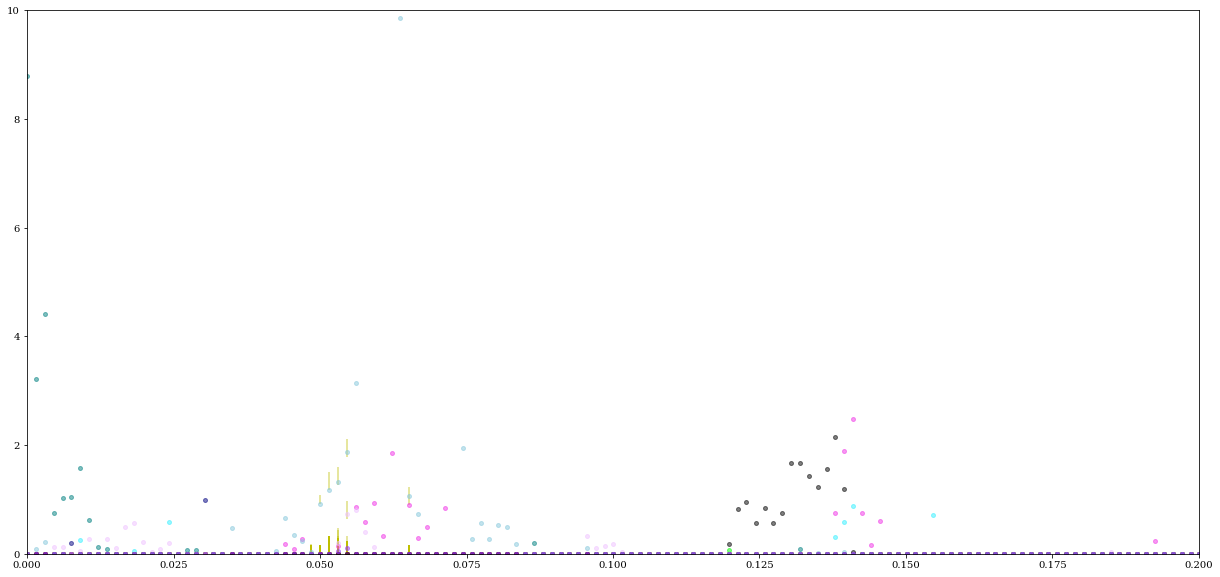

In [0]:
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio3 = np.zeros((len(t3m4), 15))
F_inf3 = np.zeros((len(t3m4), 15))
F_sup3 = np.zeros((len(t3m4), 15))
inf3 = np.zeros((len(t3m4), 15))
sup3 = np.zeros((len(t3m4), 15))
inf_sup_3 = np.zeros((2, len(t3m4)))
inf_sup3 = []
#inf_sup3.append(inf_sup_3[:,:])
#, inf_sup_3[:,:]

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], t3m4)
  F_medio3[:,j], F_inf3[:,j], F_sup3[:,j], inf3[:,j], sup3[:,j], inf_sup_3[:,:] = conversion(datos_med4[j][t3_in_m4:t3_fin_m4], L, U, parametros[j])
  inf_sup3.append(inf_sup_3[:,:])

plt.figure(figsize=(21,10))
for i in range(15):
  plt.errorbar(t3m4-t3m4[0], F_medio3[:,i], yerr=inf_sup3[i], fmt='.', ecolor='y', alpha=alpha, markersize=8, color=color[i], label='S'+str(i))
  #plt.plot(t3m4-t3m4[0], F_medio3[:,i], 'ro')#, yerr=inf_sup3[i], uplims=True, lolims=True, fmt='.', ecolor='y', alpha=alpha, markersize=8, color=color[i], label='S'+str(i))

plt.xlim(0,0.2)
plt.ylim(0,10)

#inf_sup_3[:,:]=

In [5]:
inimed1, finmed1 = 720, 7693
inimed2, finmed2 = 7695, 10361
inimed3, finmed3 = 10363 , 23003
inimed4, finmed4 = 23005 , 28868 #se soltó el sensor 12, 8 y 1


"""
Multi Timer 1 : fin med
Multi Timer 2 : comienzo exp
Multi Timer 3 : toques sensor
Multi Timer 4 : inicio med
Multi Timer 5 : comienzo exp
Multi Timer 6 : fin med
Multi Timer 7 : toques sensor
Multi Timer 8 : inicio med
Multi Timer 9 : comienzo exp
Multi Timer 10 : fin med
Multi Timer 11 : inicio med
Multi Timer 12 : toques sensor
"""


'\nMulti Timer 1 : fin med\nMulti Timer 2 : comienzo exp\nMulti Timer 3 : toques sensor\nMulti Timer 4 : inicio med\nMulti Timer 5 : comienzo exp\nMulti Timer 6 : fin med\nMulti Timer 7 : toques sensor\nMulti Timer 8 : inicio med\nMulti Timer 9 : comienzo exp\nMulti Timer 10 : fin med\nMulti Timer 11 : inicio med\nMulti Timer 12 : toques sensor\n'

In [6]:
tiempo_med1_crudo = (datos[inimed1:finmed1,0]-datos[inimed1,0])/60000
lectura_med1_crudo = []
for i in range(15):
  lectura_med1_crudo.append(datos[inimed1:finmed1,i+1])
  
tiempo_med2_crudo = (datos[inimed3:finmed3,0]-datos[inimed2,0])/60000
"""
t_ini1 = T_crono[7][2]
t_ini2 = T_crono[7][3]
t_ini3 = T_crono[7][4]
t_ini4 = T_crono[7][5]
t_ini5 = T_crono[7][6]

t_fin1 = T_crono[5][2]
t_fin2 = T_crono[5][3]
t_fin3 = T_crono[5][4]
t_fin4 = T_crono[5][5]
t_fin5 = T_crono[5][6]
"""
#print(t_ini1)

'\nt_ini1 = T_crono[7][2]\nt_ini2 = T_crono[7][3]\nt_ini3 = T_crono[7][4]\nt_ini4 = T_crono[7][5]\nt_ini5 = T_crono[7][6]\n\nt_fin1 = T_crono[5][2]\nt_fin2 = T_crono[5][3]\nt_fin3 = T_crono[5][4]\nt_fin4 = T_crono[5][5]\nt_fin5 = T_crono[5][6]\n'

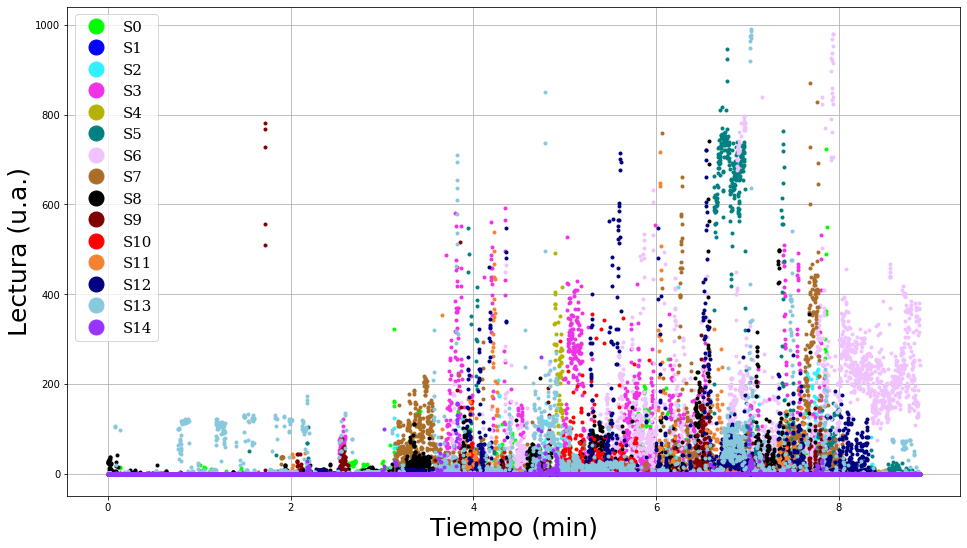

In [0]:
plt.figure(figsize=(16,9))
for i in range(15): #[2]:#
  plt.plot((datos[inimed4:finmed4,0]-datos[inimed4,0])/60000,datos[inimed4:finmed4,i+1], '.', color=color[i], label='S'+str(i))
  plt.grid()
"""
for j in range(len(T_crono[10])):
  plt.axvline(T_crono[10][j], color='b')#, label='inicios')
  plt.axvline(T_crono[9][j], color='r')#, label='finales')
for k in range(len(T_crono[11])):
  plt.axvline(T_crono[11][k], color='g',  linestyle='--')#, label='toques')
"""
plt.rc('font', **font)
plt.legend(fontsize=15, markerscale=5)
plt.xlabel('Tiempo (min)', fontsize=25)
plt.ylabel('Lectura (u.a.)', fontsize=25)

#plt.savefig('med4.png')
plt.show()

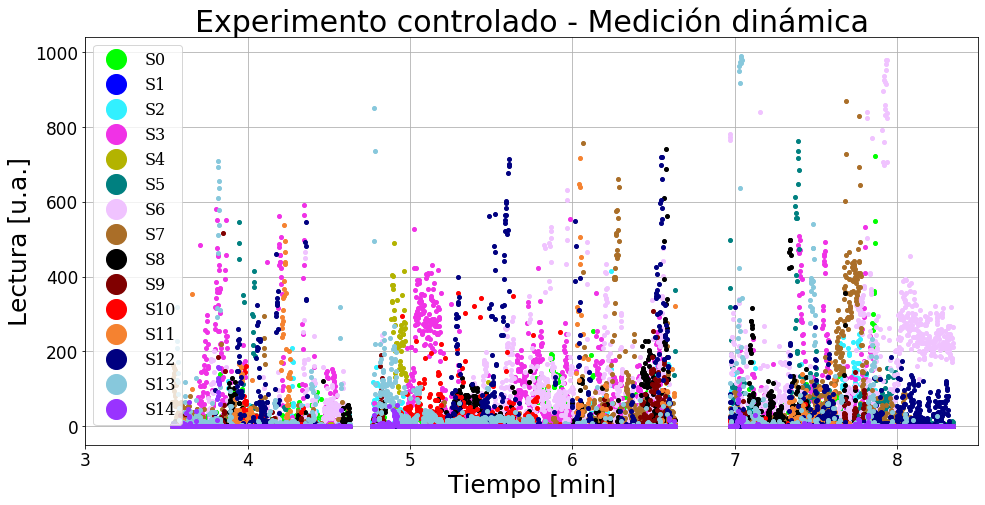

In [7]:
tiempo_med4 = (datos[inimed4:finmed4,0]-datos[inimed4,0])/60000
datos_med4 = []
for i in range(15):
  datos_med4.append(datos[inimed4:finmed4,i+1])

t1_in_m4, t1_fin_m4 = 2343, 3066
t2_in_m4, t2_fin_m4 = 3156, 4377 #4489 me fijo qué pasa si corto los datos para sacar la última parte de la medición
t3_in_m4, t3_fin_m4 = 4599, 5507
t1m4 = tiempo_med4[t1_in_m4:t1_fin_m4]
t2m4 = tiempo_med4[t2_in_m4:t2_fin_m4]
t3m4 = tiempo_med4[t3_in_m4:t3_fin_m4]

plt.figure(figsize=(16,7.5))
for i in range(15): #[2]:#
  plt.plot(t1m4, datos_med4[i][t1_in_m4:t1_fin_m4], '.', markersize=8, color=color[i], label='S'+str(i))
  plt.plot(t2m4, datos_med4[i][t2_in_m4:t2_fin_m4], '.',  markersize=8, color=color[i])#, label='S'+str(i))
  plt.plot(t3m4, datos_med4[i][t3_in_m4:t3_fin_m4], '.',  markersize=8, color=color[i])#, label='S'+str(i))
  plt.grid()
plt.rc('font', **font)
plt.title('Experimento controlado - Medición dinámica', fontsize=30)
plt.legend(fontsize=16, markerscale=5.)
plt.xlabel('Tiempo [min]', fontsize=25)
plt.ylabel('Lectura [u.a.]', fontsize=25)
plt.yticks(fontsize=17) #[0, 200, 400, 600, 800, 1000]
plt.xticks(fontsize=17)
plt.xlim(3,8.5)
plt.savefig('serie_temporal_Ddc.png')
plt.show()

In [0]:
#Convertimos la lectura a fuerza para la medición en el subteB del 16/9
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio1 = np.zeros((len(t1m4), 15))
F_inf1 = np.zeros((len(t1m4), 15))
F_sup1 = np.zeros((len(t1m4), 15))
inf1 = np.zeros((len(t1m4), 15))
sup1 = np.zeros((len(t1m4), 15))
inf_sup_1 = np.zeros((2, len(t1m4)))
inf_sup1 = []

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], t1m4)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio1[:,j], F_inf1[:,j], F_sup1[:,j], inf1[:,j], sup1[:,j], inf_sup_1[:,:] = conversion(datos_med4[j][t1_in_m4:t1_fin_m4], L, U, parametros[j])
  inf_sup1.append(inf_sup_1[:,:])
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))

F_medio2 = np.zeros((len(t2m4), 15))
F_inf2 = np.zeros((len(t2m4), 15))
F_sup2 = np.zeros((len(t2m4), 15))
inf2 = np.zeros((len(t2m4), 15))
sup2 = np.zeros((len(t2m4), 15))
inf_sup_2 = np.zeros((2, len(t2m4)))
inf_sup2 = []

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], t2m4)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio2[:,j], F_inf2[:,j], F_sup2[:,j], inf2[:,j], sup2[:,j], inf_sup_2[:,:] = conversion(datos_med4[j][t2_in_m4:t2_fin_m4], L, U, parametros[j])
  inf_sup2.append(inf_sup_2[:,:])
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))

F_medio3 = np.zeros((len(t3m4), 15))
F_inf3 = np.zeros((len(t3m4), 15))
F_sup3 = np.zeros((len(t3m4), 15))
inf3 = np.zeros((len(t3m4), 15))
sup3 = np.zeros((len(t3m4), 15))
inf_sup_3 = np.zeros((2, len(t3m4)))
inf_sup3 = []

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], t3m4)
  F_medio3[:,j], F_inf3[:,j], F_sup3[:,j], inf3[:,j], sup3[:,j], inf_sup_3[:,:] = conversion(datos_med4[j][t3_in_m4:t3_fin_m4], L, U, parametros[j])
  inf_sup3.append(inf_sup_3[:,:])


F1, F2, F3 = [],[],[] #esto ahora no lo uso para nada
for i in range(15):
  F1.append(np.mean(F_medio1[:,i]))
  F2.append(np.mean(F_medio2[:,i]))
  F3.append(np.mean(F_medio3[:,i]))

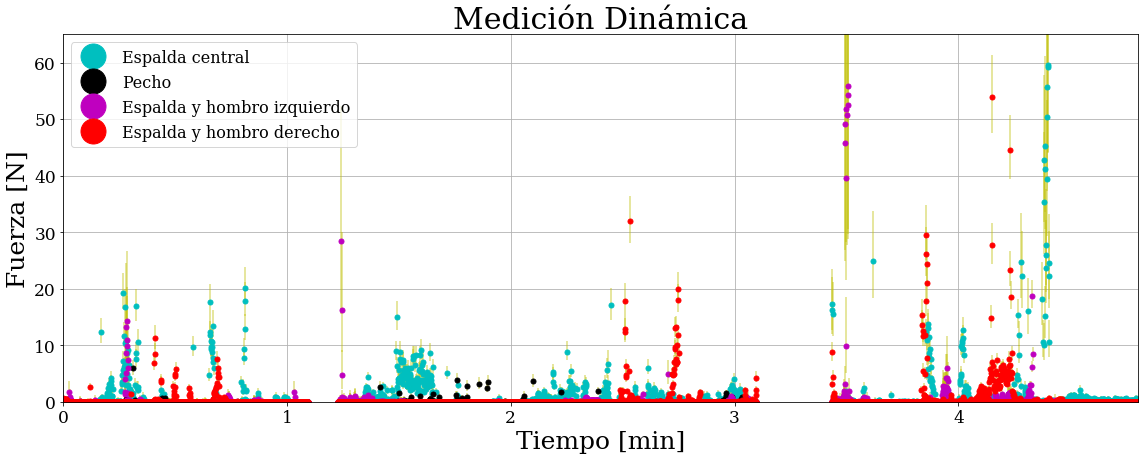

In [9]:
espalda_central = [3,4,6]
pecho_central = [9,10]
espalda_hombro_izq = [0,2,13,14] #tal vez acá viene el 15
espalda_hombro_der = [5,7,11] #tal vez acá viene el 14
espalda, pecho, hombr_izq, hombr_der = 'c', 'k', 'm', 'r'
ms=10
plt.figure(figsize=(16,6.5))
#for i in [0,2,3,4,5,6,7,9,10,11,14,15]:# range(15): #[2]:#saco el 1, 8, 12 y 13
for i in espalda_central:
  esp, = plt.plot(t1m4-t1m4[0], F_medio1[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(t2m4-t1m4[0], F_medio2[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(t3m4-t1m4[0], F_medio3[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  
for i in pecho_central:
  pech, = plt.plot(t1m4-t1m4[0], F_medio1[:,i], '.', markersize=ms, color=pecho)#, label='S'+str(i))
  plt.plot(t2m4-t1m4[0], F_medio2[:,i], '.', markersize=ms, color=pecho)#, label='S'+str(i))
  plt.plot(t3m4-t1m4[0], F_medio3[:,i], '.', markersize=ms, color=pecho)#, label='S'+str(i))
  
for i in espalda_hombro_izq:
  izq, = plt.plot(t1m4-t1m4[0], F_medio1[:,i], '.', markersize=ms, color=hombr_izq)#, label='S'+str(i))
  plt.plot(t2m4-t1m4[0], F_medio2[:,i], '.', markersize=ms, color=hombr_izq)#, label='S'+str(i))
  plt.plot(t3m4-t1m4[0], F_medio3[:,i], '.', markersize=ms, color=hombr_izq)#, label='S'+str(i))
  
for i in espalda_hombro_der:
  der, = plt.plot(t1m4-t1m4[0], F_medio1[:,i], '.', markersize=ms, color=hombr_der)#, label='S'+str(i))
  plt.plot(t2m4-t1m4[0], F_medio2[:,i], '.', markersize=ms, color=hombr_der)#, label='S'+str(i))
  plt.plot(t3m4-t1m4[0], F_medio3[:,i], '.', markersize=ms, color=hombr_der)#, label='S'+str(i))
  #plt.fill_between(t_filt[:]-t_filt[1215], s_filt[:,j]-err_sinf_filt[:,j], s_filt[:,j]+err_ssup_filt[:,j], color='purple', alpha=0.2)

for i in [0,2,3,4,5,6,7,9,10,11,13,14]:
  plt.vlines(t1m4-t1m4[0], F_inf1[:,i], F_sup1[:,i], color='y', alpha=alpha)
  plt.vlines(t2m4-t1m4[0], F_inf2[:,i], F_sup2[:,i], color='y', alpha=alpha)
  plt.vlines(t3m4-t1m4[0], F_inf3[:,i], F_sup3[:,i], color='y', alpha=alpha)
  plt.grid()

plt.rc('font', **font)
plt.title('Medición Dinámica', fontsize=30)
plt.legend( [ esp, pech, izq, der , (esp, pech, izq, der)] , ["Espalda central", "Pecho", "Espalda y hombro izquierdo", "Espalda y hombro derecho"], fontsize=16, markerscale=5., loc='upper left')
plt.xlabel('Tiempo [min]', fontsize=25)
plt.ylabel('Fuerza [N]', fontsize=25)
plt.yticks(fontsize=17) #[0, 200, 400, 600, 800, 1000]
plt.xticks(fontsize=17)
plt.grid()
plt.xlim(0,4.8)
plt.ylim(0,65)
plt.tight_layout()
plt.savefig('serie_temporal_DF.png')
plt.show()

[7.769823934161761, 8.870596579259146, 9.928850866233516]


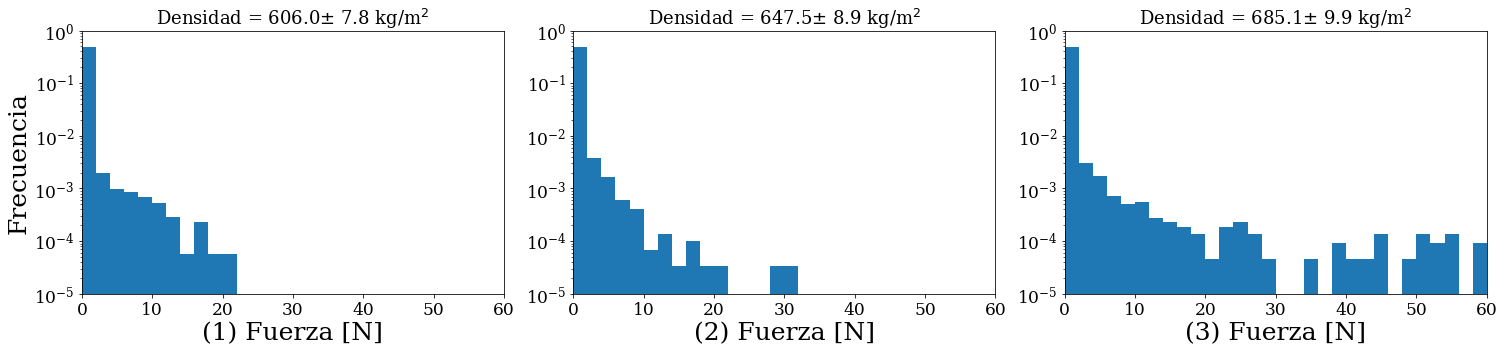

In [12]:
n_personas4 = 14
peso_4 = 945.4
volumen4 = [1.56, 1.46, 1.38] #en m³

Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]

xlimd, xlimu = 0, 60
ylimd, ylimu= 0.00001, 1

for i in [0,2,3,4,5,6,7,9,10,11,13,14]: 
  Fuerza1concat=np.concatenate([F_medio1[:,i],Fuerza1concat])
  Fuerza2concat=np.concatenate([F_medio2[:,i],Fuerza2concat])
  Fuerza3concat=np.concatenate([F_medio3[:,i],Fuerza3concat])
  
F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat]
orde, anchobin = 1, 2

sigS_j = []
for j in range(len(sigma_sensores)):
  sigS_j.append(inversa(sigma_sensores[j],parametros[j][0],parametros[j][1],parametros[j][2])**2)

sigmaSe = np.sqrt(sum(sigS_j))

densidad4 = []
densidad_peso4 = []
sigmaS4 = []
err_dens4 = []
for i in range(3):
  densidad4.append(n_personas4/volumen4[i])
  densidad_peso4.append(peso_4/volumen4[i])
  errd = np.sqrt( ((1/volumen4[i])**2)*(0.1**2) + (((peso_4/(volumen4[i]**2))**2)*(0.02**2))  )
  err_dens4.append(errd)
  sigmaS4.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0]) 
prom2, err2, mediana2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0])
prom3, err3, mediana3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0])
errm1, errm2, errm3 = (1.253/np.sqrt(len(Fuerza1concat[Fuerza1concat>0])))*err1, (1.253/np.sqrt(len(Fuerza2concat[Fuerza2concat>0])))*err2, (1.253/np.sqrt(len(Fuerza3concat[Fuerza3concat>0])))*err3
prom_4 = [prom1, prom2, prom3]
err_4 = [err1, err2, err3]
med_4 = [mediana1, mediana2, mediana3]
err_med4 = [errm1, errm2, errm3]
FT4 = []

print(err_dens4)
plt.figure(figsize=(21,5)) #Este tamaño se ve bien para el informe
#plt.title('Experimento controlado - Muri quieta - Convertido a Fuerza', fontsize=30)
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.rc('legend',fontsize=18)

#r'$\pm$ 'str(round(err_dens4[i],2))+r' kg/m$^2$'

for i in range(3):
  FT = sum(F_concat[i])
  FT4.append(FT)
  plt.subplot(1,3,i+1)
  plt.hist(F_concat[i], bins=np.arange(0,32)*anchobin, density=True)#, label='Promedio = '+str(round(prom_4[i],orde))+r'$\pm$ '+str(round(err_4[i],orde))+' N \n Mediana = '+str(round(med_4[i],orde))+r'$\pm$ '+str(round(err_med4[i],orde))+' N')
  plt.title('Densidad = '+str(round(densidad_peso4[i],orde))+r'$\pm$ '+str(round(err_dens4[i],orde))+r' kg/m$^2$', fontsize=18)#+r' kg/m$^2$ - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS4[i]))+' N', fontsize=18)
  #plt.legend(loc='upper center')
  plt.yscale("log")
  plt.xlabel('('+str(i+1)+') Fuerza [N]')
  if i==0:
    plt.ylabel('Frecuencia')
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)
  plt.yticks([0.00001, 0.0001,0.001,0.01,0.1,1])

plt.tight_layout()
plt.savefig('histD.png')
plt.show()

In [0]:
for j in range(5):
  print(round(densidad2[j],1))

for j in range(3):
  print(round(densidad4[j],1))

9.3
10.0
10.8
11.5
11.8


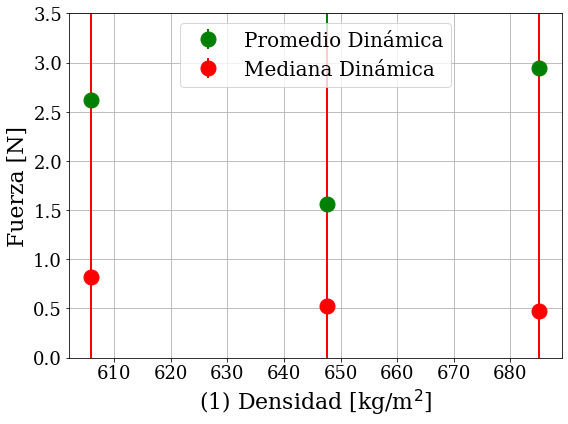

"\nplt.subplot(1,2,2)\nplt.rc('axes',labelsize=22)\nplt.rc('xtick',labelsize=18)\nplt.rc('ytick',labelsize=18)\nplt.rc('legend',fontsize=20)\nplt.errorbar(densidad4, prom_4, err_4, fmt='g.', markersize=12, linewidth=2)\nplt.errorbar(densidad4, med_4, err_4, fmt='r.', markersize=12, linewidth=2)\nplt.grid()\nplt.ylabel('Fuerza [N]')\nplt.xlabel(r'(2) Densidad [p/m$^2$]')\n\nplt.rc('axes',labelsize=22)\nplt.rc('xtick',labelsize=18)\nplt.rc('ytick',labelsize=18)\nplt.rc('legend',fontsize=20)\nplt.errorbar(densidad_peso4, FT4, sigmaS4, fmt='g.', markersize=12, linewidth=2)\nplt.grid()\nplt.ylabel('Fuerza Total [N]')\nplt.xlabel(r'(2) Densidad [kg/m$^2$]')\n\nplt.subplot(1,2,2)\nplt.rc('axes',labelsize=22)\nplt.rc('xtick',labelsize=18)\nplt.rc('ytick',labelsize=18)\nplt.rc('legend',fontsize=20)\nplt.errorbar(densidad4, FT4, sigmaS4, fmt='g.', markersize=12, linewidth=2)\nplt.grid()\nplt.ylabel('Fuerza Total [N]')\nplt.xlabel(r'(2) Densidad [p/m$^2$]')\nplt.tight_layout()\nplt.savefig('curva

In [0]:
plt.figure(figsize=[8,6])
#plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso4, prom_4, err_4, fmt='go', markersize=15, linewidth=2, label='Promedio Dinámica')
plt.errorbar(densidad_peso4, med_4, err_4, fmt='ro', markersize=15, linewidth=2, label='Mediana Dinámica')
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'(1) Densidad [kg/m$^2$]')
plt.legend(loc='upper center')
plt.ylim(0,3.5)
plt.tight_layout()
plt.savefig('curvaD.png')
plt.show()

#plt.figure(figsize=[16,6])
#plt.subplot(1,2,1)


"""
plt.subplot(1,2,2)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad4, prom_4, err_4, fmt='g.', markersize=12, linewidth=2)
plt.errorbar(densidad4, med_4, err_4, fmt='r.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'(2) Densidad [p/m$^2$]')

plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso4, FT4, sigmaS4, fmt='g.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza Total [N]')
plt.xlabel(r'(2) Densidad [kg/m$^2$]')

plt.subplot(1,2,2)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad4, FT4, sigmaS4, fmt='g.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza Total [N]')
plt.xlabel(r'(2) Densidad [p/m$^2$]')
plt.tight_layout()
plt.savefig('curvaDp.png')
plt.show()
"""



In [0]:
espalda_central = [1,3,12]
pecho_central = [2,13,15]
espalda_hombro_izq = [0,5,8,10,11] #tal vez acá viene el 15
espalda_hombro_der = [4,6,7,9,14] #tal vez acá viene el 14

In [0]:
t1in_med2 = 5505 #tiempo_med2_crudo[5505]
t2in_med2 = 6240 #tiempo_med2_crudo[6240]
t3in_med2 = 7003 #tiempo_med2_crudo[7003]
t4in_med2 = 7700 #tiempo_med2_crudo[7700]
t5in_med2 = 8485 #tiempo_med2_crudo[8485]

t1fin_med2 = 6189 #tiempo_med2_crudo[6189]
t2fin_med2 = 6902 #tiempo_med2_crudo[6902]
t3fin_med2 = 7557 #tiempo_med2_crudo[7557]
t4fin_med2 = 8371 #tiempo_med2_crudo[8371]
t5fin_med2 = 8933 #tiempo_med2_crudo[8933]

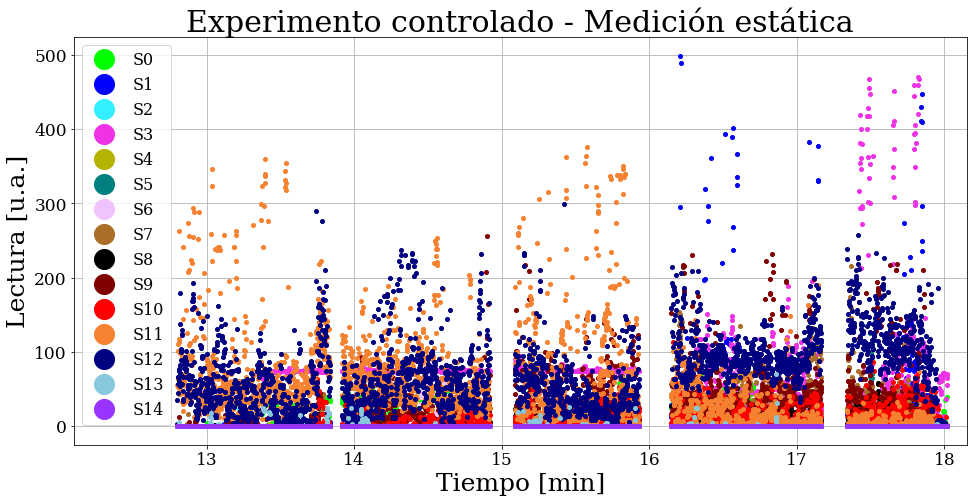

In [0]:
plt.figure(figsize=(16,7.5))
for i in range(15): #[2]:#
  plt.plot(tiempo_med2_crudo[t1in_med2:t1fin_med2],datos[inimed3+t1in_med2:inimed3+t1fin_med2,i+1], '.', markersize=8, color=color[i], label='S'+str(i))#
  plt.plot(tiempo_med2_crudo[t2in_med2:t2fin_med2],datos[inimed3+t2in_med2:inimed3+t2fin_med2,i+1], '.', markersize=8, color=color[i])
  plt.plot(tiempo_med2_crudo[t3in_med2:t3fin_med2],datos[inimed3+t3in_med2:inimed3+t3fin_med2,i+1], '.', markersize=8, color=color[i])
  plt.plot(tiempo_med2_crudo[t4in_med2:t4fin_med2],datos[inimed3+t4in_med2:inimed3+t4fin_med2,i+1], '.', markersize=8, color=color[i])
  plt.plot(tiempo_med2_crudo[t5in_med2:t5fin_med2],datos[inimed3+t5in_med2:inimed3+t5fin_med2,i+1], '.', markersize=8, color=color[i])  
  plt.grid()
plt.rc('font', **font)
plt.title('Experimento controlado - Medición estática', fontsize=30)
plt.legend(fontsize=16, markerscale=5.)
plt.xlabel('Tiempo [min]', fontsize=25)
plt.ylabel('Lectura [u.a.]', fontsize=25)
plt.yticks(fontsize=17) #[0, 200, 400, 600, 800, 1000]
plt.xticks(fontsize=17)
plt.xlim(12.1,18.15)
plt.savefig('serie_temporal_Edc.png')
plt.show()

In [0]:
#Convertimos la lectura a fuerza para la medición en el subteB del 16/9
tiempo1 = tiempo_med2_crudo[t1in_med2:t1fin_med2]

#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio1 = np.zeros((len(tiempo1), 15))
F_inf1 = np.zeros((len(tiempo1), 15))
F_sup1 = np.zeros((len(tiempo1), 15))
inf1 = np.zeros((len(tiempo1), 15))
sup1 = np.zeros((len(tiempo1), 15))

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo1)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio1[:,j], F_inf1[:,j], F_sup1[:,j], inf1[:,j], sup1[:,j] = conversionaux(datos[inimed3+t1in_med2:inimed3+t1fin_med2,j+1], L, U, parametros[j])

tiempo2 = tiempo_med2_crudo[t2in_med2:t2fin_med2]

#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio2 = np.zeros((len(tiempo2), 15))
F_inf2 = np.zeros((len(tiempo2), 15))
F_sup2 = np.zeros((len(tiempo2), 15))
inf2 = np.zeros((len(tiempo2), 15))
sup2 = np.zeros((len(tiempo2), 15))

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo2)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio2[:,j], F_inf2[:,j], F_sup2[:,j], inf2[:,j], sup2[:,j] = conversionaux(datos[inimed3+t2in_med2:inimed3+t2fin_med2,j+1], L, U, parametros[j])

tiempo3 = tiempo_med2_crudo[t3in_med2:t3fin_med2]
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio3 = np.zeros((len(tiempo3), 15))
F_inf3 = np.zeros((len(tiempo3), 15))
F_sup3 = np.zeros((len(tiempo3), 15))
inf3 = np.zeros((len(tiempo3), 15))
sup3 = np.zeros((len(tiempo3), 15))

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo3)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio3[:,j], F_inf3[:,j], F_sup3[:,j], inf3[:,j], sup3[:,j] = conversionaux(datos[inimed3+t3in_med2:inimed3+t3fin_med2,j+1], L, U, parametros[j])
  
tiempo4 = tiempo_med2_crudo[t4in_med2:t4fin_med2]
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio4 = np.zeros((len(tiempo4), 15))
F_inf4 = np.zeros((len(tiempo4), 15))
F_sup4 = np.zeros((len(tiempo4), 15))
inf4 = np.zeros((len(tiempo4), 15))
sup4 = np.zeros((len(tiempo4), 15))

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo4)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio4[:,j], F_inf4[:,j], F_sup4[:,j], inf4[:,j], sup4[:,j] = conversionaux(datos[inimed3+t4in_med2:inimed3+t4fin_med2,j+1], L, U, parametros[j])
  
tiempo5 = tiempo_med2_crudo[t5in_med2:t5fin_med2]
#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio5 = np.zeros((len(tiempo5), 15))
F_inf5 = np.zeros((len(tiempo5), 15))
F_sup5 = np.zeros((len(tiempo5), 15))
inf5 = np.zeros((len(tiempo5), 15))
sup5 = np.zeros((len(tiempo5), 15))

for j in range(15):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo5)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio5[:,j], F_inf5[:,j], F_sup5[:,j], inf5[:,j], sup5[:,j] = conversionaux(datos[inimed3+t5in_med2:inimed3+t5fin_med2,j+1], L, U, parametros[j])

F1, F2, F3, F4, F5 = [],[],[],[],[]
for i in range(15):
  F1.append(np.mean(F_medio1[:,i]))
  F2.append(np.mean(F_medio2[:,i]))
  F3.append(np.mean(F_medio3[:,i]))
  F4.append(np.mean(F_medio4[:,i]))
  F5.append(np.mean(F_medio5[:,i]))

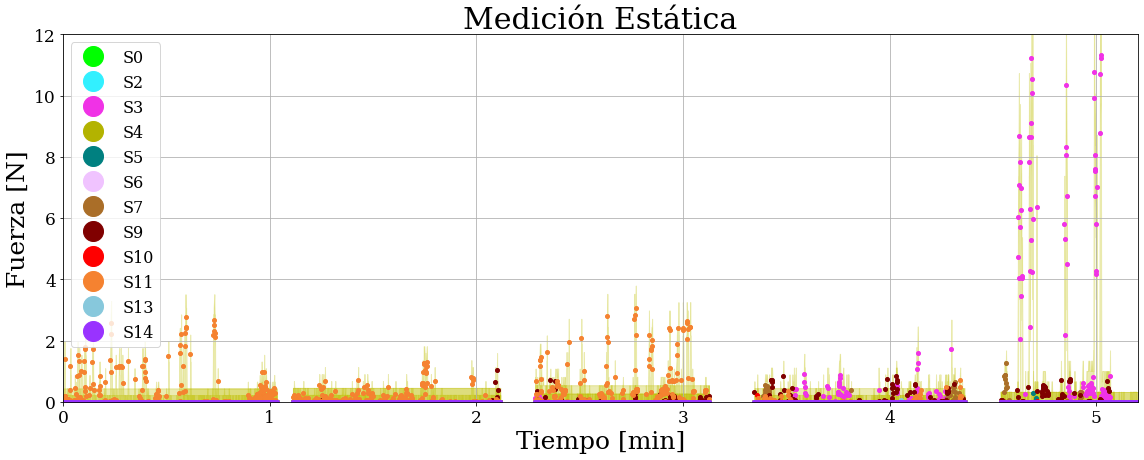

In [15]:
espalda_central = [0,1,3,4,6]
pecho_central = [8,9,10]
espalda_hombro_izq = [0,2,13,14] #tal vez acá viene el 15
espalda_hombro_der = [5,7,11,12] #tal vez acá viene el 14

plt.figure(figsize=(16,6.5))
for i in [0,2,3,4,5,6,7,9,10,11,13,14]: #[0,2,3,4,5,6,7,9,10,11,13,14]: #por si es que acá tampoco estaban todos los sensores, sacamos el 1, 8 y 12
  plt.plot(tiempo1-tiempo1[0], F_medio1[:,i], '.', markersize=8,color=color[i], label='S'+str(i))
  plt.plot(tiempo2-tiempo1[0], F_medio2[:,i], '.', markersize=8,color=color[i])
  plt.plot(tiempo3-tiempo1[0], F_medio3[:,i], '.', markersize=8,color=color[i])
  plt.plot(tiempo4-tiempo1[0], F_medio4[:,i], '.', markersize=8,color=color[i])
  plt.plot(tiempo5-tiempo1[0], F_medio5[:,i], '.', markersize=8,color=color[i]) 
  plt.fill_between(tiempo1-tiempo1[0], F_inf1[:,i], F_sup1[:,i], color='y', alpha=0.3)
  plt.fill_between(tiempo2-tiempo1[0], F_inf2[:,i], F_sup2[:,i], color='y', alpha=0.3)
  plt.fill_between(tiempo3-tiempo1[0], F_inf3[:,i], F_sup3[:,i], color='y', alpha=0.3)
  plt.fill_between(tiempo4-tiempo1[0], F_inf4[:,i], F_sup4[:,i], color='y', alpha=0.3)
  plt.fill_between(tiempo5-tiempo1[0], F_inf5[:,i], F_sup5[:,i], color='y', alpha=0.3) 
plt.grid()
plt.rc('font', **font)
plt.title('Medición Estática', fontsize=30)  
plt.legend(fontsize=16, markerscale=5., loc='upper left')
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.rc('legend',fontsize=15)
plt.xlabel('Tiempo [min]', fontsize=25)
plt.ylabel('Fuerza [N]', fontsize=25)
plt.xlim(0,5.2)
plt.ylim(0,12)
plt.tight_layout()
#plt.savefig('serie_temporal_EF.png')
plt.show()

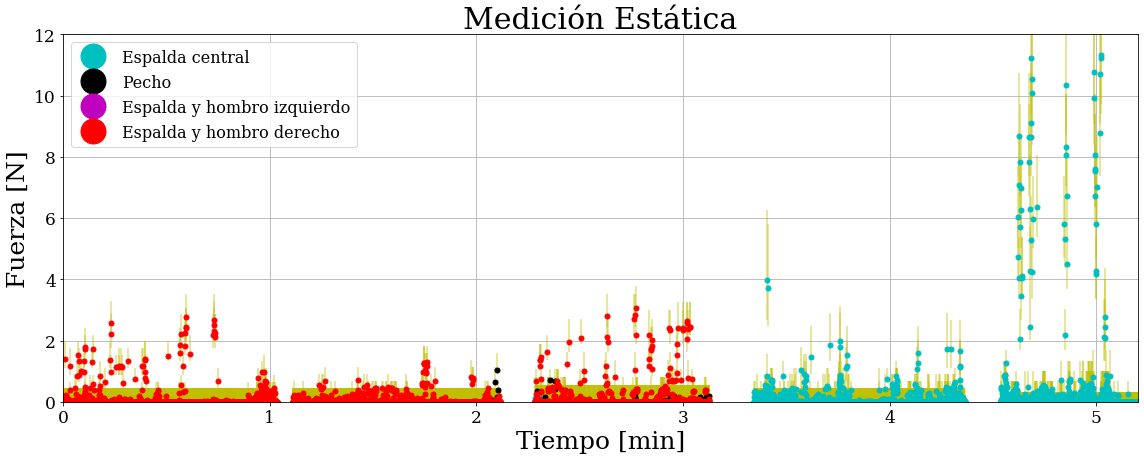

In [16]:
espalda_central = [1,3,4,6]
pecho_central = [8,9,10]
espalda_hombro_izq = [0,2,13,14] #tal vez acá viene el 15
espalda_hombro_der = [5,7,11,12] #tal vez acá viene el 14
espalda, pecho, hombr_izq, hombr_der = 'c', 'k', 'm', 'r'
ms=10
plt.figure(figsize=(16,6.5))
#for i in [0,2,3,4,5,6,7,9,10,11,14,15]:# range(15): #[2]:#saco el 1, 8, 12 y 13
for i in espalda_central:
  esp, = plt.plot(tiempo1-tiempo1[0], F_medio1[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo2-tiempo1[0], F_medio2[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo3-tiempo1[0], F_medio3[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo4-tiempo1[0], F_medio4[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo5-tiempo1[0], F_medio5[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  
for i in pecho_central:
  pech, = plt.plot(tiempo1-tiempo1[0], F_medio1[:,i], '.', markersize=ms, color=pecho)#, label='S'+str(i))
  plt.plot(tiempo2-tiempo1[0], F_medio2[:,i], '.', markersize=ms, color=pecho)#, label='S'+str(i))
  plt.plot(tiempo3-tiempo1[0], F_medio3[:,i], '.', markersize=ms, color=pecho)#, label='S'+str(i))
  plt.plot(tiempo4-tiempo1[0], F_medio4[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo5-tiempo1[0], F_medio5[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  
for i in espalda_hombro_izq:
  izq, = plt.plot(tiempo1-tiempo1[0], F_medio1[:,i], '.', markersize=ms, color=hombr_izq)#, label='S'+str(i))
  plt.plot(tiempo2-tiempo1[0], F_medio2[:,i], '.', markersize=ms, color=hombr_izq)#, label='S'+str(i))
  plt.plot(tiempo3-tiempo1[0], F_medio3[:,i], '.', markersize=ms, color=hombr_izq)#, label='S'+str(i))
  plt.plot(tiempo4-tiempo1[0], F_medio4[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo5-tiempo1[0], F_medio5[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  
for i in espalda_hombro_der:
  der, = plt.plot(tiempo1-tiempo1[0], F_medio1[:,i], '.', markersize=ms, color=hombr_der)#, label='S'+str(i))
  plt.plot(tiempo2-tiempo1[0], F_medio2[:,i], '.', markersize=ms, color=hombr_der)#, label='S'+str(i))
  plt.plot(tiempo3-tiempo1[0], F_medio3[:,i], '.', markersize=ms, color=hombr_der)#, label='S'+str(i))
  plt.plot(tiempo4-tiempo1[0], F_medio4[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  plt.plot(tiempo5-tiempo1[0], F_medio5[:,i], '.', markersize=ms, color=espalda)#, label='S'+str(i))
  #plt.fill_between(t_filt[:]-t_filt[1215], s_filt[:,j]-err_sinf_filt[:,j], s_filt[:,j]+err_ssup_filt[:,j], color='purple', alpha=0.2)

for i in range(15):
  plt.vlines(tiempo1-tiempo1[0], F_inf1[:,i], F_sup1[:,i], color='y', alpha=alpha)
  plt.vlines(tiempo2-tiempo1[0], F_inf2[:,i], F_sup2[:,i], color='y', alpha=alpha)
  plt.vlines(tiempo3-tiempo1[0], F_inf3[:,i], F_sup3[:,i], color='y', alpha=alpha)
  plt.vlines(tiempo4-tiempo1[0], F_inf4[:,i], F_sup4[:,i], color='y', alpha=alpha)
  plt.vlines(tiempo5-tiempo1[0], F_inf5[:,i], F_sup5[:,i], color='y', alpha=alpha)
  plt.grid()

plt.rc('font', **font)
plt.title('Medición Estática', fontsize=30)
plt.legend( [ esp, pech, izq, der , (esp, pech, izq, der)] , ["Espalda central", "Pecho", "Espalda y hombro izquierdo", "Espalda y hombro derecho"], fontsize=16, markerscale=5., loc='upper left')
plt.xlabel('Tiempo [min]', fontsize=25)
plt.ylabel('Fuerza [N]', fontsize=25)
plt.yticks(fontsize=17) #[0, 200, 400, 600, 800, 1000]
plt.xticks(fontsize=17)
plt.xlim(0,5.2)
plt.ylim(0,12)
plt.tight_layout()
#plt.savefig('serie_temporal_EF.png')
plt.show()

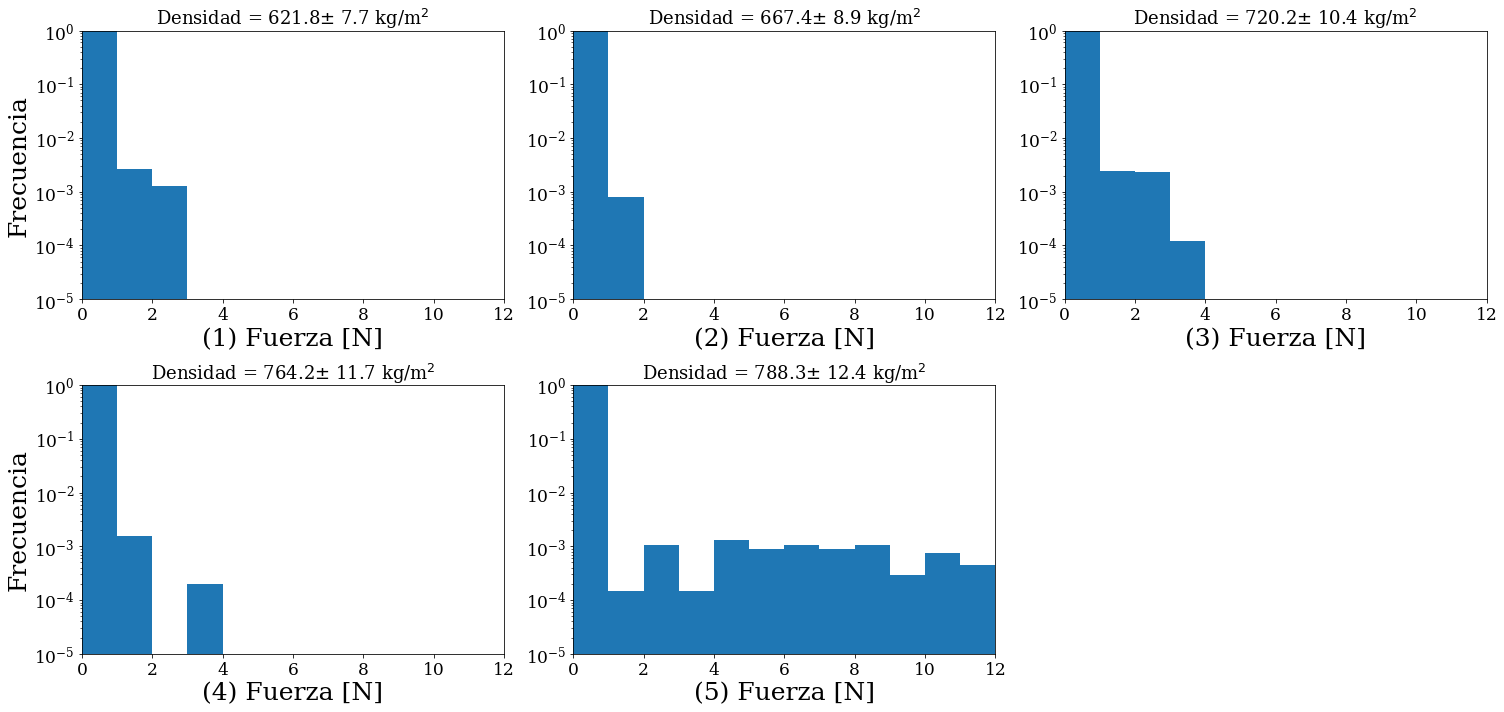

In [18]:
Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]
Fuerza4concat=[]
Fuerza5concat=[]

xlimd, xlimu = 0, 12
ylimd, ylimu= 0.00001, 1

for i in range(15):
  Fuerza1concat=np.concatenate([F_medio1[:,i],Fuerza1concat])
  Fuerza2concat=np.concatenate([F_medio2[:,i],Fuerza2concat])
  Fuerza3concat=np.concatenate([F_medio3[:,i],Fuerza3concat])
  Fuerza4concat=np.concatenate([F_medio4[:,i],Fuerza4concat])
  Fuerza5concat=np.concatenate([F_medio5[:,i],Fuerza5concat])

F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat,Fuerza4concat,Fuerza5concat]
orde, anchobin = 1, 1

n_personas2 = 15
peso_2 = 1001.1
volumen2 = [1.61, 1.50, 1.39, 1.31, 1.27] #en m³

densidad2 = []
densidad_peso2 = []
sigmaS2 = []
err_dens2 =[]
for i in range(5):
  densidad2.append(n_personas2/volumen2[i])
  densidad_peso2.append(peso_2/volumen2[i])
  errd = np.sqrt( ((1/volumen2[i])**2)*(0.1**2) + (((peso_2/(volumen2[i]**2))**2)*(0.02**2))  )
  err_dens2.append(errd)
  sigmaS2.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0])
prom2, err2, mediana2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0])
prom3, err3, mediana3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0])
prom4, err4, mediana4 = np.mean(Fuerza4concat[Fuerza4concat>0]), np.std(Fuerza4concat[Fuerza4concat>0]), np.median(Fuerza4concat[Fuerza4concat>0])
prom5, err5, mediana5 = np.mean(Fuerza5concat[Fuerza5concat>0]), np.std(Fuerza5concat[Fuerza5concat>0]), np.median(Fuerza5concat[Fuerza5concat>0])
errm1, errm2, errm3, errm4, errm5 = (1.253/np.sqrt(len(Fuerza1concat[Fuerza1concat>0])))*err1, (1.253/np.sqrt(len(Fuerza2concat[Fuerza2concat>0])))*err2, (1.253/np.sqrt(len(Fuerza3concat[Fuerza3concat>0])))*err3, (1.253/np.sqrt(len(Fuerza4concat[Fuerza4concat>0])))*err4, (1.253/np.sqrt(len(Fuerza5concat[Fuerza5concat>0])))*err5
err_med2 = [errm1, errm2, errm3, errm4, errm5]
prom_2 = [prom1, prom2, prom3, prom4, prom5]
err_2 = [err1, err2, err3, err4, err5]
med_2 = [mediana1, mediana2, mediana3, mediana4, mediana5]
FT2 = []

plt.figure(figsize=(21,10)) #Este tamaño se ve bien para el informe

#plt.title('Experimento controlado - Muri quieta - Convertido a Fuerza', fontsize=30)
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.rc('legend',fontsize=18)

for i in range(5):
  FT = sum(F_concat[i])
  FT2.append(FT)
  plt.subplot(2,3,i+1)
  if i == 0:
    plt.ylabel('Frecuencia')
  elif i == 3:
    plt.ylabel('Frecuencia')
  plt.hist(F_concat[i], bins=np.arange(0,20)*anchobin, density=True)#, label='Promedio = '+str(round(prom_2[i],orde))+r'$\pm$ '+str(round(err_2[i],orde))+' N \n Mediana = '+str(round(med_2[i],orde))+r'$\pm$ '+str(round(err_med2[i],orde))+' N')
  plt.title('Densidad = '+str(round(densidad_peso2[i],orde))+r'$\pm$ '+str(round(err_dens2[i],orde))+r' kg/m$^2$', fontsize=18)
  #plt.title('Densidad='+str(round(densidad_peso2[i],2))+r' kg/m$^2$ - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS2[i]))+' N', fontsize=18)
  #plt.legend(loc='upper center')
  plt.yscale("log")
  plt.xlabel('('+str(i+1)+') Fuerza [N]')
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)
  plt.yticks([0.00001, 0.0001,0.001,0.01,0.1,1])
plt.tight_layout()
plt.savefig('histE.png')
plt.show()

[9.316770186335404,
 10.0,
 10.79136690647482,
 11.450381679389313,
 11.811023622047244]

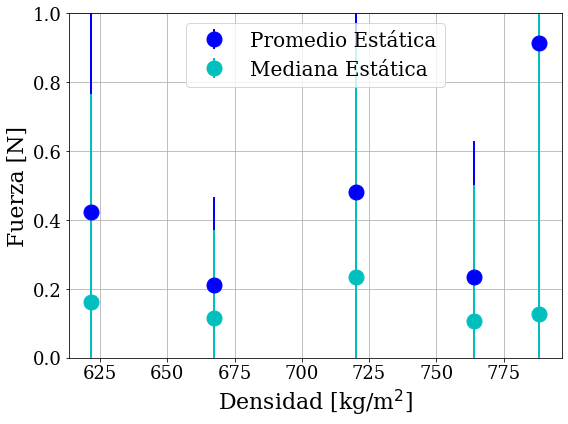

In [0]:
plt.figure(figsize=[8,6])
#plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso2, prom_2, err_2, fmt='bo', markersize=15, linewidth=2, label='Promedio Estática')
plt.errorbar(densidad_peso2, med_2, err_2, fmt='co', markersize=15, linewidth=2, label='Mediana Estática')
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'Densidad [kg/m$^2$]')
plt.legend(loc='upper center')
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('curvaE.png')

plt.show()

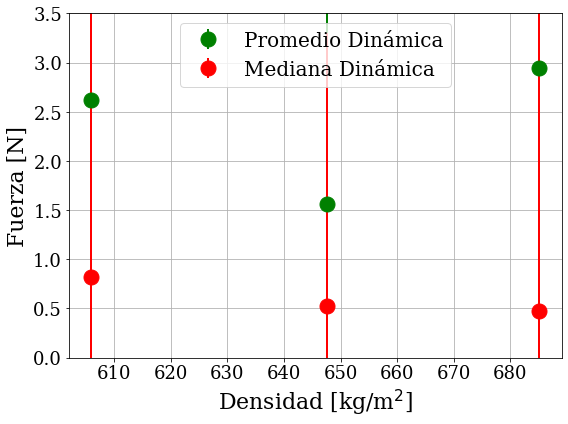

In [0]:

plt.figure(figsize=[8,6])
#plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso4, prom_4, err_4, fmt='go', markersize=15, linewidth=2, label='Promedio Dinámica')
plt.errorbar(densidad_peso4, med_4, err_4, fmt='ro', markersize=15, linewidth=2, label='Mediana Dinámica')
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'Densidad [kg/m$^2$]')
plt.legend(loc='upper center')
plt.ylim(0,3.5)
plt.tight_layout()
plt.savefig('curvaD.png')
plt.show()

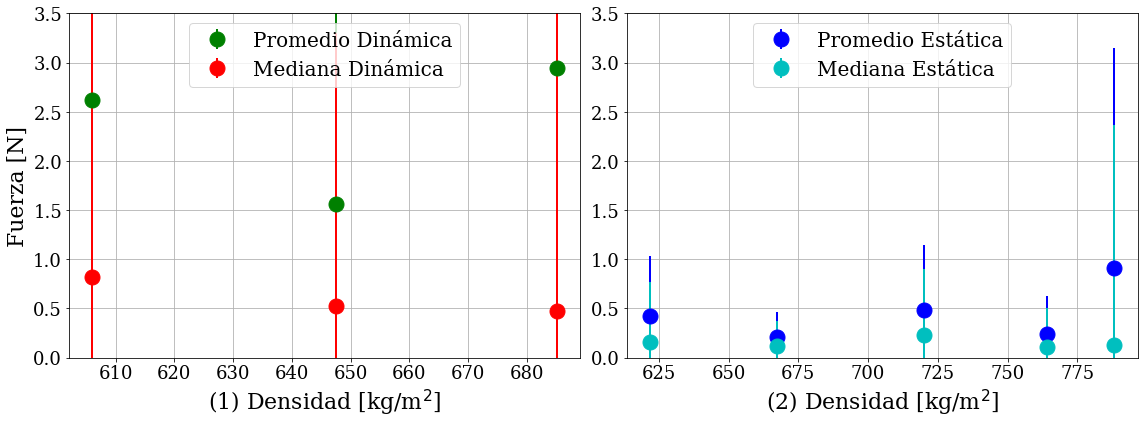

In [0]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso4, prom_4, err_4, fmt='go', markersize=15, linewidth=2, label='Promedio Dinámica')
plt.errorbar(densidad_peso4, med_4, err_4, fmt='ro', markersize=15, linewidth=2, label='Mediana Dinámica')
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'(1) Densidad [kg/m$^2$]')
plt.legend(loc='upper center')
plt.ylim(0,3.5)

plt.subplot(1,2,2)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso2, prom_2, err_2, fmt='bo', markersize=15, linewidth=2, label='Promedio Estática')
plt.errorbar(densidad_peso2, med_2, err_2, fmt='co', markersize=15, linewidth=2, label='Mediana Estática')
plt.grid()
#plt.ylabel('Fuerza [N]')
plt.xlabel(r'(2) Densidad [kg/m$^2$]')
plt.legend(loc='upper center')
plt.ylim(0,3.5)

plt.tight_layout()
plt.savefig('curvaED.png')

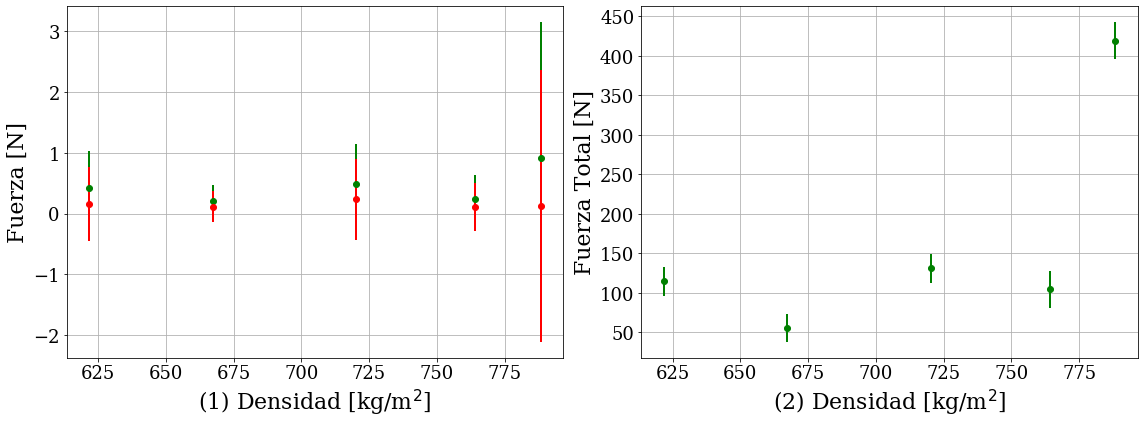

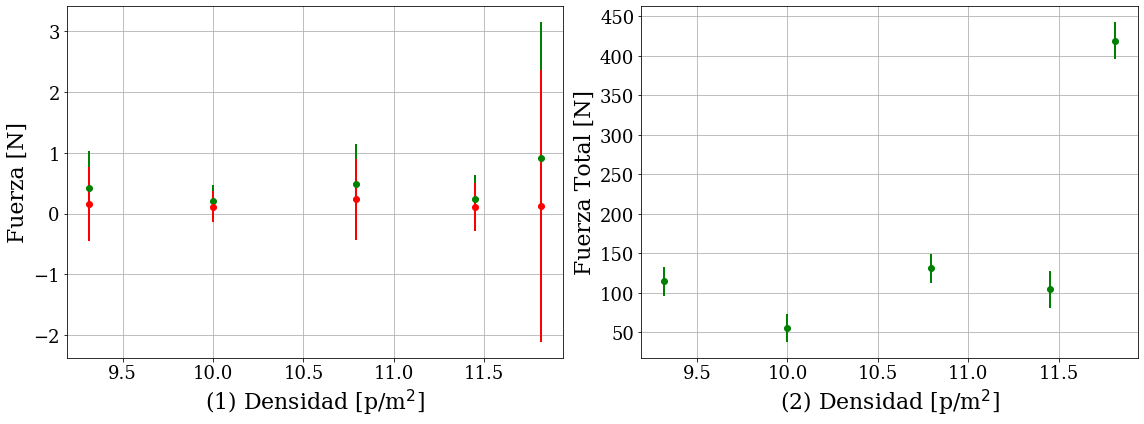

In [0]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso2, prom_2, err_2, fmt='g.', markersize=12, linewidth=2)
plt.errorbar(densidad_peso2, med_2, err_2, fmt='r.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'(1) Densidad [kg/m$^2$]')

plt.subplot(1,2,2)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso2, FT2, sigmaS2, fmt='g.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza Total [N]')
plt.xlabel(r'(2) Densidad [kg/m$^2$]')

plt.tight_layout()
plt.savefig('curvaEkg.png')
plt.show()

plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad2, prom_2, err_2, fmt='g.', markersize=12, linewidth=2)
plt.errorbar(densidad2, med_2, err_2, fmt='r.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'(1) Densidad [p/m$^2$]')

plt.subplot(1,2,2)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad2, FT2, sigmaS2, fmt='g.', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza Total [N]')
plt.xlabel(r'(2) Densidad [p/m$^2$]')

plt.tight_layout()
plt.savefig('curvaEp.png')
plt.show()

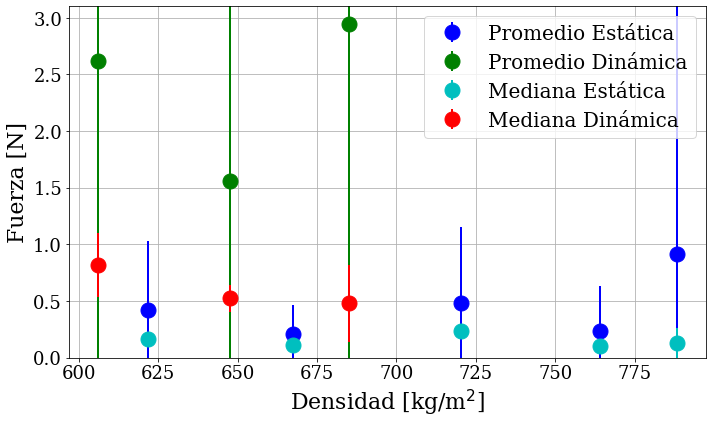

"\n\nplt.subplot(1,2,2)\nplt.rc('axes',labelsize=22)\nplt.rc('xtick',labelsize=18)\nplt.rc('ytick',labelsize=18)\nplt.rc('legend',fontsize=20)\nplt.errorbar(densidad_peso2, FT2, sigmaS2, fmt='go', markersize=12, linewidth=2, label='Estática')\nplt.errorbar(densidad_peso4, FT4, sigmaS4, fmt='bo', markersize=12, linewidth=2, label='Dinámica')\nplt.legend()\nplt.grid()\nplt.ylabel('Fuerza Total [N]')\nplt.xlabel(r'(2) Densidad [kg/m$^2$]')\n"

In [0]:
plt.figure(figsize=[10,6])

#plt.subplot(1,2,1)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso2, prom_2, err_2, fmt='bo', markersize=15, linewidth=2, label='Promedio Estática')
plt.errorbar(densidad_peso4, prom_4, err_4, fmt='go', markersize=15, linewidth=2, label='Promedio Dinámica')
plt.errorbar(densidad_peso2, med_2, err_med2, fmt='co', markersize=15, linewidth=2, label='Mediana Estática')
plt.errorbar(densidad_peso4, med_4, err_med4, fmt='ro', markersize=15, linewidth=2, label='Mediana Dinámica')
plt.legend(loc='upper right')
plt.grid()
plt.ylabel('Fuerza [N]')
plt.xlabel(r'Densidad [kg/m$^2$]')
plt.ylim(0,3.1)

plt.tight_layout()
plt.savefig('ambas_FvsD.png')
plt.show()

"""

plt.subplot(1,2,2)
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.errorbar(densidad_peso2, FT2, sigmaS2, fmt='go', markersize=12, linewidth=2, label='Estática')
plt.errorbar(densidad_peso4, FT4, sigmaS4, fmt='bo', markersize=12, linewidth=2, label='Dinámica')
plt.legend()
plt.grid()
plt.ylabel('Fuerza Total [N]')
plt.xlabel(r'(2) Densidad [kg/m$^2$]')
"""

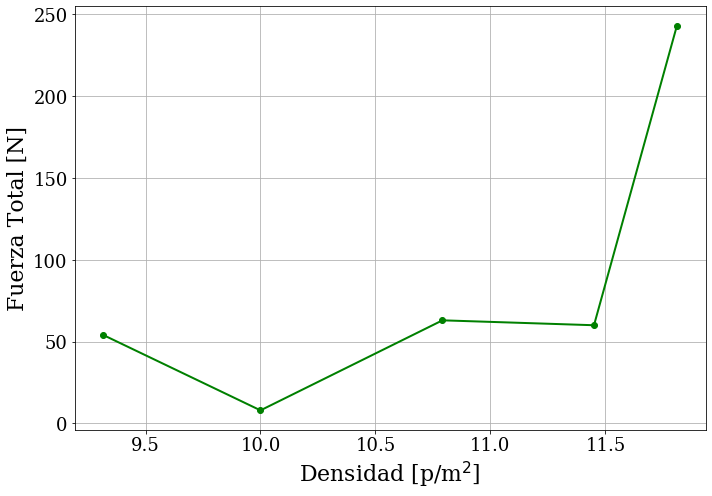

In [0]:
areaf = [ft1, ft2, ft3, ft4, ft5]
plt.figure(figsize=[10,7])
plt.rc('axes',labelsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend',fontsize=20)
plt.plot(densidad, areaf, 'g.-', markersize=12, linewidth=2)
plt.grid()
plt.ylabel('Fuerza Total [N]')
plt.xlabel(r'Densidad [p/m$^2$]')
plt.tight_layout()
plt.savefig('curvaconN.png')
plt.show()

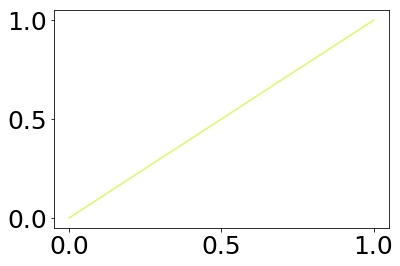

In [0]:
i=1
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),color=color[i])

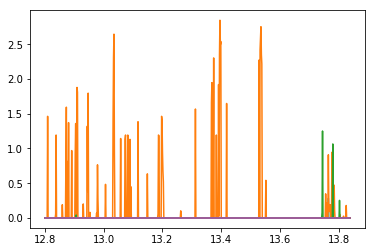

In [0]:
plt.plot(tiempo_med2_crudo[t1in_med2:t1fin_med2],F_medio1)

In [0]:
plt.figure(figsize=(15,9))
for i in range(15): #[2]:#
  #plt.plot((datos[inimed2:finmed2,0]-datos[inimed2,0]*np.ones(len(datos[inimed2:finmed2,0])))/60000,datos[inimed2:finmed2,i+1], '.', label='S'+str(i))
  plt.plot(tiempo_med2_crudo,datos[inimed3:finmed3,i+1], '.', color=color[i], label='S'+str(i))
  plt.grid()
"""  
for j in range(len(T_crono[7])):
  plt.axvline(T_crono[7][j])#, label='inicios')
  plt.axvline(T_crono[5][j], color='r')#, label='finales')
for k in range(len(T_crono[6])):
  plt.axvline(T_crono[6][k], color='g', linestyle='--')#, label='toques')
"""  
plt.legend()
plt.xlim(12.5,18)
plt.show()

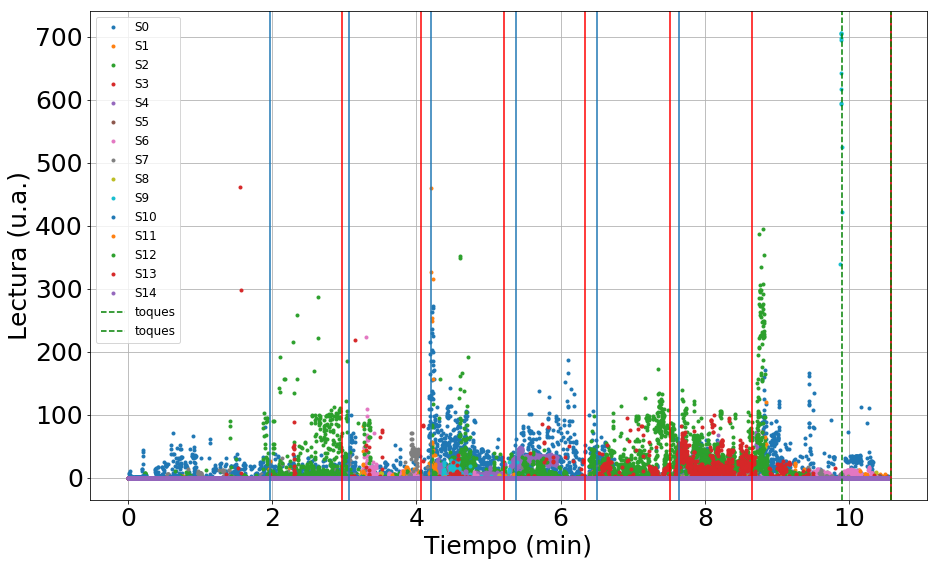

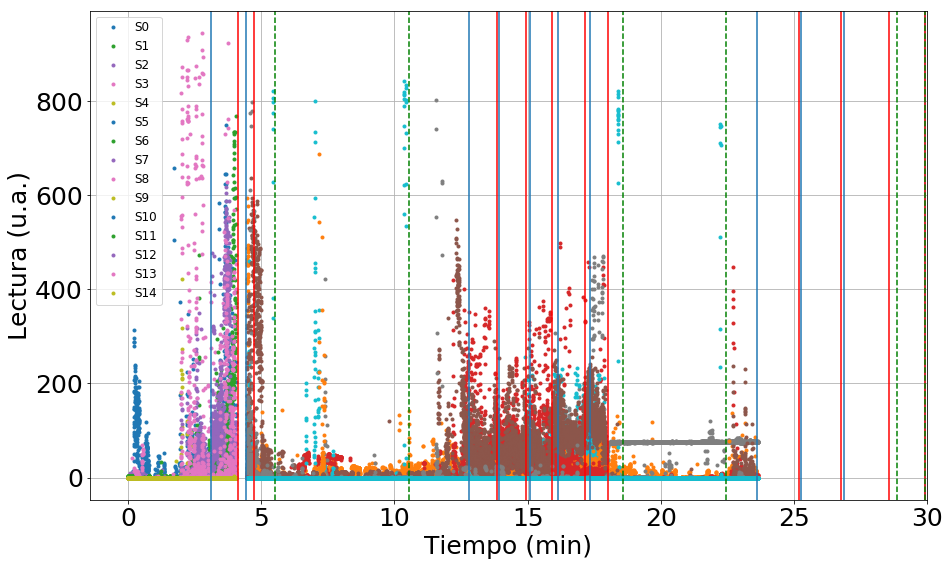

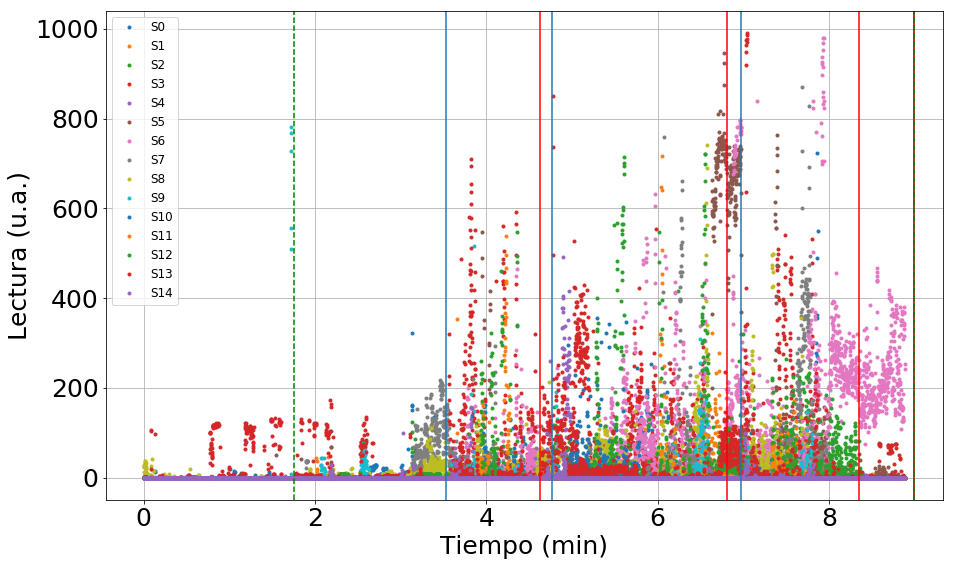

In [0]:
plt.figure(figsize=(15,9))
for i in range(15): #[2]:#
  plt.plot((datos[inimed1:finmed1,0]-datos[inimed1,0])/60000,datos[inimed1:finmed1,i+1], '.', label='S'+str(i))
  plt.grid()
for j in range(len(T_crono[3])):
  plt.axvline(T_crono[3][j])#, label='inicios')
  plt.axvline(T_crono[0][j], color='r')#, label='finales')
for k in range(len(T_crono[2])):
  plt.axvline(T_crono[2][k], color='g', linestyle='--', label='toques')
plt.legend()
plt.xlabel('Tiempo (min)')
plt.ylabel('Lectura (u.a.)')
#plt.savefig('med1.png')
plt.show()

plt.figure(figsize=(15,9))
for i in range(15): #[2]:#
  plt.plot((datos[inimed2:finmed2,0]-datos[inimed2,0]*np.ones(len(datos[inimed2:finmed2,0])))/60000,datos[inimed2:finmed2,i+1], '.', label='S'+str(i))
  plt.plot((datos[inimed3:finmed3,0]-datos[inimed2,0])/60000,datos[inimed3:finmed3,i+1], '.')#, label='S'+str(i))
  plt.grid()
for j in range(len(T_crono[7])):
  plt.axvline(T_crono[7][j])#, label='inicios')
  plt.axvline(T_crono[5][j], color='r')#, label='finales')
for k in range(len(T_crono[6])):
  plt.axvline(T_crono[6][k], color='g', linestyle='--')#, label='toques')
plt.legend()
plt.xlabel('Tiempo (min)')
plt.ylabel('Lectura (u.a.)')

#plt.savefig('med2+3.png')
plt.show()

"""
plt.figure(figsize=(15,9))
for i in range(15): #[2]:#
  plt.plot(datos[inimed3:finmed3,0]/60000,datos[inimed3:finmed3,i+1], '.', label='S'+str(i))
  plt.grid()
plt.legend()
plt.show()
"""

plt.figure(figsize=(15,9))
for i in range(15): #[2]:#
  plt.plot((datos[inimed4:finmed4,0]-datos[inimed4,0])/60000,datos[inimed4:finmed4,i+1], '.', label='S'+str(i))
  plt.grid()
for j in range(len(T_crono[10])):
  plt.axvline(T_crono[10][j])#, label='inicios')
  plt.axvline(T_crono[9][j], color='r')#, label='finales')
for k in range(len(T_crono[11])):
  plt.axvline(T_crono[11][k], color='g',  linestyle='--')#, label='toques')
plt.legend()
plt.xlabel('Tiempo (min)')
plt.ylabel('Lectura (u.a.)')

#plt.savefig('med4.png')
plt.show()

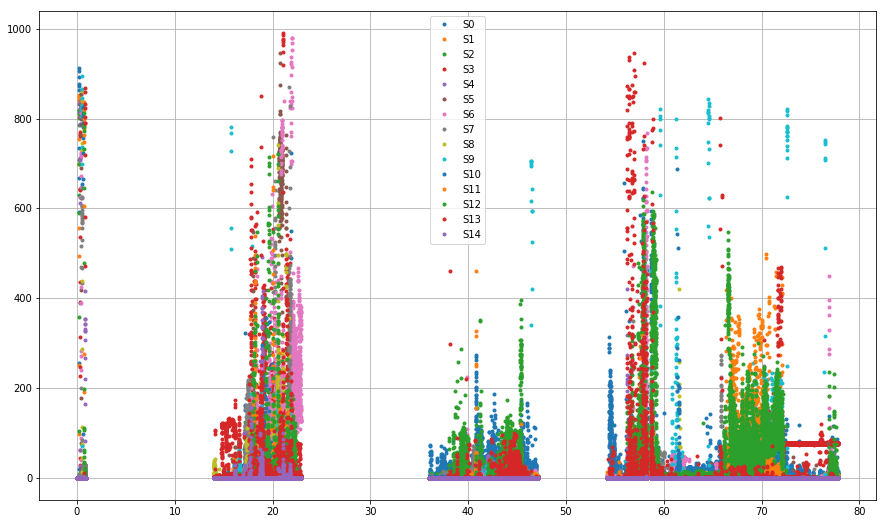

In [0]:
plt.figure(figsize=(15,9))
for i in range(15): #[2]:#
  plt.plot(datos[:,0]/60000,datos[:,i+1], '.', label='S'+str(i))
  plt.grid()
plt.legend()
plt.show()

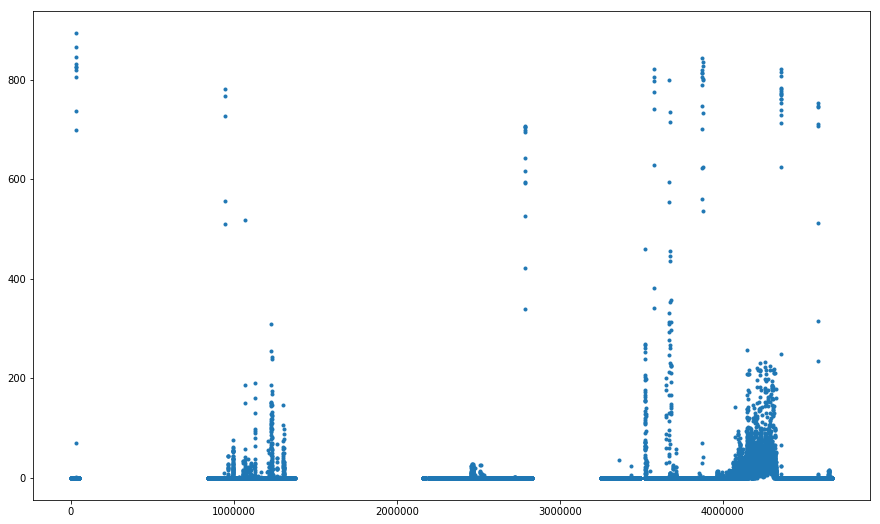

In [0]:
j = 9
inicio, fin = 0 , len(datos[:,0])
plt.figure(figsize=(15,9))
plt.plot(datos[inicio:fin,0], datos[inicio:fin,j+1], '.', label='S'+str(j))
#plt.xlim(0,600)